<a href="https://colab.research.google.com/github/mingshey/python_projects/blob/main/Refraction_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 물 속 공간의 굴절상



* 목표: 물 속 공간을 격자 모양으로 구획하여 물 밖에서 본 상의 모습을 구한다.

* 방법:
1. POV(관측점, 수면 위)와 물 속 물체의 위치(OBJ)가 주어졌을 때 페르마 원리(최소 시간 원리)를 이용하여 입사점(POI; point of incidence)의 x좌표를 구한다.
2. 물체에서 입사점 근방 두 점으로 나오는 광선 각각의 굴절각을 이용하여 물 밖으로 굴절하여 나오는 광선 각각의 1차 방정식을 구한다.
3. 두 방정식을 연립하여 풀어 상의 위치를 구한다.
4. 1~3 과정을 함수로 만든다.
5. 4에서 만든 함수를 이용하여 물속 격자의 상을 구한다.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import sympy as sym
import scipy as sci

In [ ]:
sym.init_printing()

In [ ]:
# 각각 공기와 물의 굴절률
n1, n2 = 1.00, 1.33

In [ ]:
N1, N2, A, B, C, D, x = sym.symbols('n_1, n_2, A B C D x')
N1, N2, A, B, C, D, x

(n₁, n₂, A, B, C, D, x)

In [ ]:
# 입사점 기준으로 물 밖, 물 속, 각각의 경로 길이
path1 = sym.sqrt((x-A)**2 + B**2)
path2 = sym.sqrt((C-x)**2 + D**2)

# 전체 시간에 진공중의 광속을 곱한 값
ptime = N1*path1 + N2*path2

# ptime을 계산 가능한 함수로 만든 것:
ptimef = sym.lambdify((x, N1, N2, A, B, C, D), ptime)

In [ ]:
ptime

      ________________         _______________
     ╱  2           2         ╱  2          2 
n₁⋅╲╱  B  + (-A + x)   + n₂⋅╲╱  D  + (C - x)  

In [ ]:
# 전체 시간의 입사점 x좌표에 대한 미분 dt/dx
Dptime = sym.diff(ptime, x)

# Dptime을 계산 가능한 함수로 만든 것:
Dptimef = sym.lambdify((x, N1, N2, A, B, C, D), Dptime)

In [ ]:
Dptime

    n₁⋅(-A + x)          n₂⋅(-C + x)    
─────────────────── + ──────────────────
   ________________      _______________
  ╱  2           2      ╱  2          2 
╲╱  B  + (-A + x)     ╲╱  D  + (C - x)  

In [326]:
s1 = [0, 1]  # POV (관측점)
s2 = [1, -1] # OBJ (물체)

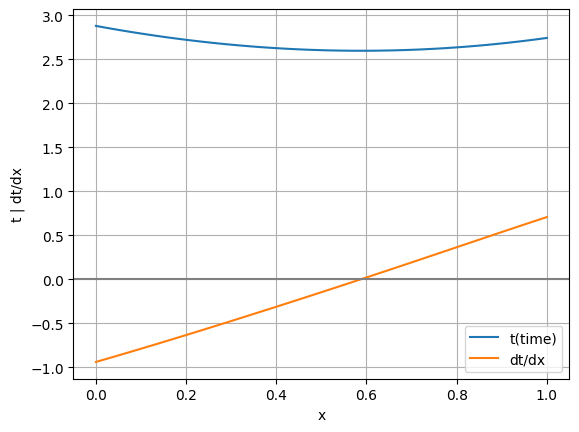

In [327]:
xs = np.linspace(0, 1, 100)
a, b, c, d = s1[0], s1[1], s2[0], s2[1]
plt.plot(xs, ptimef(xs, n1, n2, a, b, c, d), label='t(time)')
plt.plot(xs, Dptimef(xs, n1, n2, a, b, c, d), label='dt/dx')
plt.grid()
plt.axhline(0,c='gray')
plt.xlabel('x')
plt.ylabel('t | dt/dx')
plt.legend()

0.5878671239391607


Text(0.5878671239391607, 0, 'xPOI')

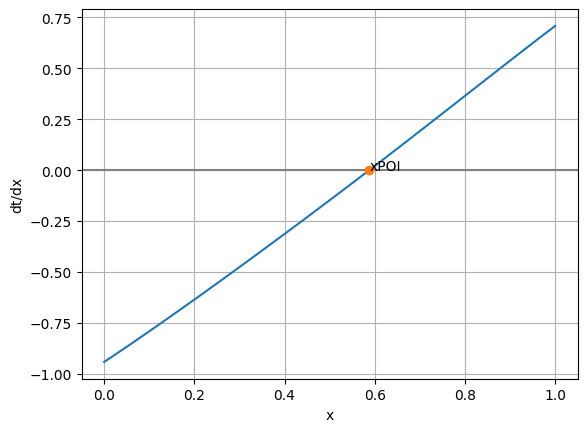

In [336]:
dpt = lambda x: Dptimef(x, n1, n2, a, b, c, d)

sol = sci.optimize.root(dpt, s2[0])
xPOI = sol.x[0]
print(xPOI)

x = np.linspace(0, 1, 100)
plt.plot(x, dpt(x))
plt.grid()
plt.xlabel('x')
plt.ylabel('dt/dx')
plt.axhline(0,c='gray')
plt.plot(xPOI, 0, 'o')
plt.text(xPOI, 0, 'xPOI')

In [329]:
# 굴절 법칙을 만족하는지 확인
from re import X
sin1 = (s1[0] - xPOI) / np.sqrt((xPOI - s1[0])**2 + s1[1]**2)
sin2 = (xPOI - s2[0]) / np.sqrt((xPOI - s2[0])**2 + s2[1]**2)
print(f"sin1/sin2={sin1/sin2}")
print(f"n2/n1={n2/n1}")

sin1/sin2=1.3300000000000003
n2/n1=1.33


In [330]:
# 광선의 경로
pts = np.array([s2, [xPOI, 0], s1])

Text(0.5878671239391607, 0, '(xPOI, 0)')

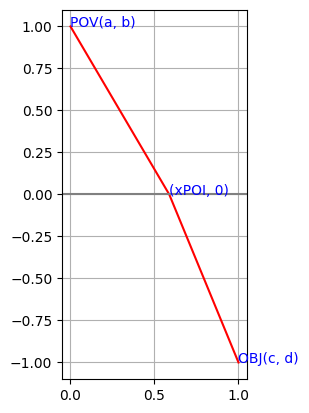

In [337]:
# 광선의 경로를 그려 본다
plt.axes().set_aspect('equal')
plt.plot(pts.T[0], pts.T[1], 'r')
plt.axhline(0, c='gray')
plt.grid()
plt.text(a, b, 'POV(a, b)', color='b')
plt.text(c, d, 'OBJ(c, d)', color='b')
plt.text(xPOI, 0, '(xPOI, 0)', color='b')

In [338]:
# 입사점 근방으로 나오는 다른 광선의 경로
delta = 3e-2
xm, xp = xPOI - delta, xPOI + delta
x2, y2 = s2[0], s2[1]
dxm = xm - x2
dxp = xp - x2
d = y2

sin2m = dxm / np.sqrt(dxm**2 + d**2)
sin2p = dxp / np.sqrt(dxp**2 + d**2)

# 스넬 법칙
sin1m = n2 / n1 * sin2m
sin1p = n2 / n1 * sin2p

# 전반사되는 경우는 제대로 예외 처리 해야 하나
# 물체에서 관측점으로 광선이 도달하는 경우를 중심으로
# 미세한 변화만을 준 것이므로 전반사는 없는 것으로 간주하여
# 여기서는 대충 얼버무리기로 한다.
if sin1m > 1:
  sin1m = 1
if sin1p > 1:
  sin1p = 1

# 굴절광선(물 밖) 방향으로 길이 1인 각 선분의 끝 점(s1m, s1p)을 구한다.
x1m = sin1m
x1p = sin1p

y1m = np.sqrt(1-x1m**2)
y1p = np.sqrt(1-x1p**2)

s1m = np.array([xm+x1m, y1m])
s1p = np.array([xp+x1p, y1p])

In [339]:
# 입사점 근방으로 나오는 광선의 연립 방정식
pcm = np.polyfit(np.array([xm, xm+x1m]), np.array([0, y1m]), 1)
pcp = np.polyfit(np.array([xp, xp+x1p]), np.array([0, y1p]), 1)
eqn2 = lambda x: np.poly1d(pcm)(x) - np.poly1d(pcp)(x)

In [340]:
# 연립 방정식의 해
sol2 = sci.optimize.root(eqn2,x2)
ix = sol2.x[0]
iy = np.poly1d(pcm)(ix)
print(ix, iy)

0.9464178427677785 -0.6090803888696094


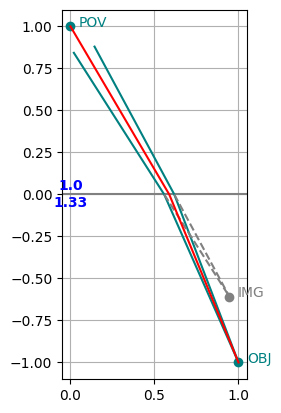

In [ ]:
# POV(관측점)와 물체(OBJ)를 잇는 광선 및 입사점(POI) 근처로 나오는 광선 및
# 두 광선의 굴절 후 경로의 연장선 및 교점(IMG; 상)을 그려 본다
plt.axes().set_aspect('equal')

plt.axhline(0, c='gray')
plt.text(s1[0], 0.01, str(n1), color='b', va='bottom', ha='center', weight='bold')
plt.text(s1[0], -0.01, str(n2), color='b', va='top', ha='center', weight='bold')

plt.grid()
pathm = np.array([s2, [xm, 0], s1m])
pathp = np.array([s2, [xp, 0], s1p])

plt.plot(pathm.T[0], pathm.T[1], 'teal')
plt.plot(pathp.T[0], pathp.T[1], 'teal')
plt.plot(s1[0], s1[1], 'o', color='teal')
plt.plot(s2[0], s2[1], 'o', color='teal')
plt.text(s1[0]+0.05, s1[1], 'POV', color='teal')
plt.text(s2[0]+0.05, s2[1], 'OBJ', color='teal')

plt.plot([xm, ix], [0, iy],color='gray', linestyle='--')
plt.plot([xp, ix], [0, iy],color='gray', linestyle='--')
plt.plot(ix, iy, 'o', color='gray')
plt.text(ix+0.05, iy, 'IMG', color='gray')

plt.plot(pts.T[0], pts.T[1], 'r')

In [ ]:
# 상의 위치를 구하는 함수
def refimg(pov, obj, nrel):
  '''
  pov: [xp, yp]; 관측점
  obj: [xo, yo]; 물체의 위치
  nrel: 물체와 물의 굴절률 비율, nrel=n2/n1
  '''
  xp, yp = pov[0], pov[1]
  xo, yo = obj[0], obj[1]
  xPOI = sci.optimize.root(lambda x: Dptimef(x, 1, nrel, xp, yp, xo, yo), xo).x[0]

  delta = 1e-8
  xm, xp = xPOI - delta, xPOI + delta
  dxm = xm - xo
  dxp = xp - xo
  d = yo

  sin2m = dxm / np.sqrt(dxm**2 + d**2)
  sin2p = dxp / np.sqrt(dxp**2 + d**2)

  sin1m = nrel * sin2m
  sin1p = nrel * sin2p

  if sin1m > 1:
    sin1m = 1
  if sin1p > 1:
    sin1p = 1

  x1m = sin1m
  x1p = sin1p

  # 굴절 광선의 방향은 POV를 향하므로 아래 식에서 np.sign()함수를 사용하여 이를 반영해 준다:
  y1m = np.sqrt(1-x1m**2) * np.sign(pov[1])
  y1p = np.sqrt(1-x1p**2) * np.sign(pov[1])

#  s1m = np.array([xm+x1m, y1m])
#  s1p = np.array([xp+x1p, y1p])

  pcm = np.polyfit(np.array([xm, xm + x1m]), np.array([0, y1m]), 1)
  pcp = np.polyfit(np.array([xp, xp + x1p]), np.array([0, y1p]), 1)

  eqn2 = lambda x: np.poly1d(pcm)(x) - np.poly1d(pcp)(x)

  sol = sci.optimize.root(eqn2,s2[0])
  ix = sol.x[0]
  iy = np.poly1d(pcm)(ix)

  return np.array([ix, iy])

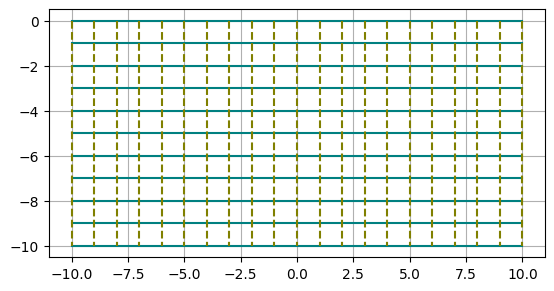

In [322]:
N = 200

class hline():
  def __init__(self, a, b, y):
    self.xs = np.linspace(a, b, N+1)
    self.ys = np.ones_like(self.xs) * y
    self.color = 'teal'
    self.ls = '-'
    self.label = None

  def set_color(self, color):
    self.color = color

  def set_linestyle(self, ls):
    self.ls = ls

  def draw(self):
    plt.plot(self.xs, self.ys, self.color, ls=self.ls, label=self.label)

class vline():
  def __init__(self, c, d, x):
    self.ys = np.linspace(c, d, N+1)
    self.xs = np.ones_like(self.ys) * x
    self.color = 'teal'
    self.ls = '-'
    self.label = None

  def set_color(self, color):
    self.color = color

  def set_linestyle(self, ls):
    self.ls = ls

  def draw(self):
    plt.plot(self.xs, self.ys, self.color, ls=self.ls, label=self.label)

class xygrid():
  def __init__(self, xrange, yrange, xnum, ynum):
    self.a, self.b = xrange
    self.c, self.d = yrange
    xstep = (xrange[1] - xrange[0]) / xnum
    ystep = (yrange[1] - yrange[0]) / ynum
    self.hors = [hline(self.a, self.b, yrange[0] + ystep * k) for k in range(ynum+1)]
    self.vers = [vline(self.c, self.d, xrange[0] + xstep * j) for j in range(xnum+1)]
    self.hcolor = 'teal'
    self.vcolor = 'olive'
    self.hls = '-'
    self.vls = '--'
    self.hlabel = None
    self.vlabel = None

  def draw(self):
    for ho in self.hors:
      ho.draw()
    for vo in self.vers:
      vo.draw()

# 수면 아래 격자 모양의 물체
xrange = [-10, 10]
yrange = [0, -10]
xnum = 20
ynum = 10

obj1 = xygrid(xrange, yrange, xnum, ynum)
for ho in obj1.hors:
  ho.set_color(obj1.hcolor)
  ho.set_linestyle(obj1.hls)
for vo in obj1.vers:
  vo.set_color(obj1.vcolor)
  vo.set_linestyle(obj1.vls)

obj1.hors[0].label = 'object'
obj1.vers[0].label = 'object'

plt.axes().set_aspect('equal')
obj1.draw()

plt.grid()

<lambdifygenerated-8>:2: RuntimeWarning: invalid value encountered in divide
  return n_1*(-A + x)/sqrt(B**2 + (-A + x)**2) + n_2*(-C + x)/sqrt(D**2 + (C - x)**2)
<ipython-input-313-9e38c5282a69>:33: RuntimeWarning: invalid value encountered in sqrt
  y1m = np.sqrt(1-x1m**2) * np.sign(pov[1])


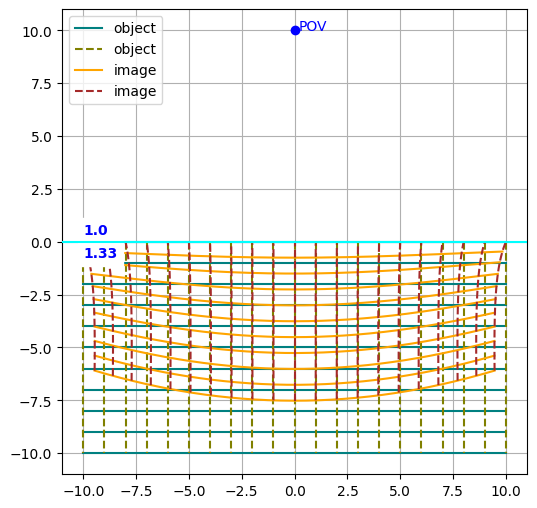

In [ ]:
pov = [0, 10]

class iline():
  def __init__(self, obj):
    self.xs = obj.xs
    self.ys = obj.ys
    self.color = 'gray'
    self.ls = '--'
    self.label = None
    self.imageloc = np.empty((0, 2))
    self.OBJs = np.empty((0, 2))

  def set_color(self, color):
    self.color = color

  def set_linestyle(self, ls):
    self.ls = ls

  def calc_xy(self, POV, nrel):
    self.OBJs = np.array([self.xs, self.ys]).T
    self.imageloc = np.array([refimg(POV, obj, nrel) for obj in self.OBJs])

  def draw(self):
    plt.plot(self.imageloc.T[0], self.imageloc.T[1], self.color, ls=self.ls, label=self.label)
#
# 격자 모양 물체의 상
plt.figure(figsize=(6, 9))
plt.axes().set_aspect('equal')

himgs = [iline(hl) for hl in hlines]
vimgs = [iline(vl) for vl in vlines]

himgs[0].label = 'image'
vimgs[0].label = 'image'

obj1.draw()

for hi in himgs:
  hi.calc_xy(pov, n2/n1)
  hi.set_color('orange')
  hi.set_linestyle('-')
  hi.draw()

for vi in vimgs:
  vi.calc_xy(pov, n2/n1)
  vi.set_color('brown')
  vi.draw()

plt.plot(pov[0], pov[1], 'o', color='b')
plt.text(pov[0]+0.2, pov[1], 'POV', color='b')

plt.grid()

plt.text(xrange[0], 0.2, str(n1), color='b', va='bottom', ha='left', \
         weight='bold', backgroundcolor='white')
plt.text(xrange[0], -0.2, str(n2), color='b', va='top', ha='left', \
         weight='bold', backgroundcolor='white')
plt.axhline(0, c='cyan', zorder=3)

plt.legend(loc='upper left')

- 수면에서 수심과 비교할 만한 거리로 어느 정도 떨어져서 보면 특이한 점은 별로 없고 전체적으로 굴절률 비율 정도로 얕아져 보일 뿐이다.

In [ ]:
class refraction_image():
  def __init__(self, obj, pov, nrel):
    self.hlines = obj.hors
    self.vlines = obj.vers
    self.pov = pov
    self.nrel = nrel
    self.himgs = [iline(hl) for hl in self.hlines]
    self.vimgs = [iline(vl) for vl in self.vlines]
    self.himgs[0].label = 'image'
    self.vimgs[0].label = 'image'
    self.leged_loc = 'upper left' if nrel > 1 else 'lower left'

    for hi in self.himgs:
      hi.set_color('orange')
      hi.set_linestyle('-')
    for vi in self.vimgs:
      vi.set_color('brown')
      vi.set_linestyle('--')
    for hi in self.himgs:
      hi.calc_xy(self.pov, self.nrel)
    for vi in self.vimgs:
      vi.calc_xy(self.pov, self.nrel)

  def draw(self):
    plt.grid()
    plt.plot(self.pov[0], self.pov[1], 'o', color='b')
    plt.text(self.pov[0]+0.2, self.pov[1], 'POV', color='b')
    xn = self.hlines[0].xs[0]

    for hi in self.himgs:
      hi.draw()
    for vi in self.vimgs:
      vi.draw()

    plt.text(xn, 0.2, str(n1), color='b', va='bottom', ha='left',\
             weight='bold', backgroundcolor='white')
    plt.text(xn, -0.2, str(n2), color='b', va='top', ha='left', \
             weight='bold', backgroundcolor='white')

    plt.axhline(0, c='cyan', zorder=3)


    plt.legend(loc=self.leged_loc)
#

<ipython-input-313-9e38c5282a69>:33: RuntimeWarning: invalid value encountered in sqrt
  y1m = np.sqrt(1-x1m**2) * np.sign(pov[1])


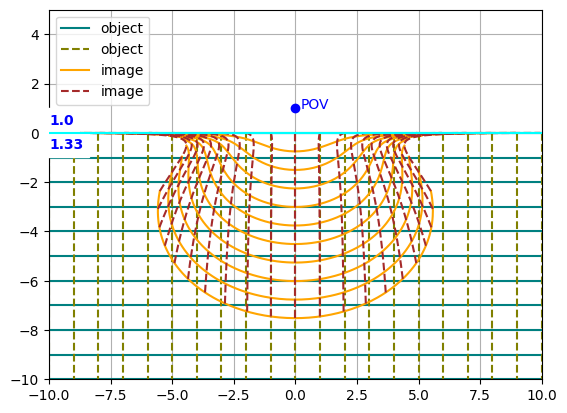

In [ ]:
pov1 = [0, 1]
plot1 = refraction_image(object, pov1, n2/n1)

plt.axes().set_aspect('equal')
plt.xlim(-10, 10)
plt.ylim(-10, 5)
obj1.draw()
plot1.draw()

- 수심에 비해 수면에 매우 가까이 다가가서 내려다보면 POV 연직 아래는 굴절률 비율로 얕아져 보이는 점은 같지만 주변 공간은 어항 모양의 작은 공간에 압축되어 보인다.

<ipython-input-313-9e38c5282a69>:33: RuntimeWarning: invalid value encountered in sqrt
  y1m = np.sqrt(1-x1m**2) * np.sign(pov[1])


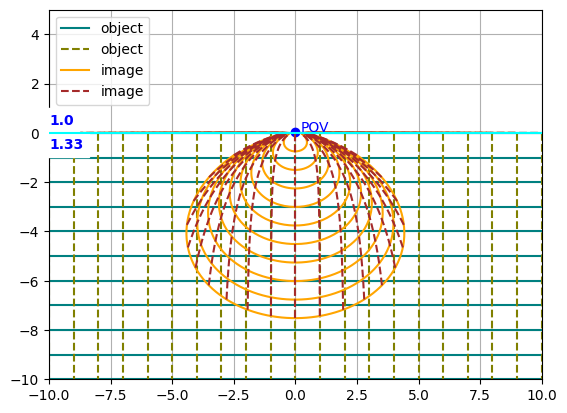

In [ ]:
pov1 = [0, delta]
plot1 = refraction_image(object, pov1, n2/n1)

plt.axes().set_aspect('equal')
plt.xlim(-10, 10)
plt.ylim(-10, 5)
obj1.draw()
plot1.draw()

plt.savefig('seashell_shape.png')
plt.savefig('seashell_shape.svg')

- 수면에 극단적으로 가까이 가서 보면 물 속 전체 공간은 가로, 세로, 깊이가 모두 물의 깊이에 비례하는 작은 공간(바닥면의 상 내부)에 압축되어 보인다. 상의 깊이는 물 깊이를 상대 굴절률로 나눈 값이다.

# 물 밖 공간을 물 속에서 올려다 본 상 (스넬의 창)



- 물 밖 공간의 구조를 차가운 색 격자로 나타내고,
- 물 속 관측점(POV)에서 본 상을 따뜻한 색 격자로 나타냄

In [ ]:
# POV는 y < 0 인 곳에 두고, 물체는 y > 0인 곳에 둔다.
# 상대 굴절률은 관측점이 위치한 곳의 굴절률(n2)에 대한 물체가 들어있는 매질의 굴절률(n1)의 비율로 한다.
refimg([0, -1], [1, 1], n1/n2)

array([1.08830884, 1.64067465])

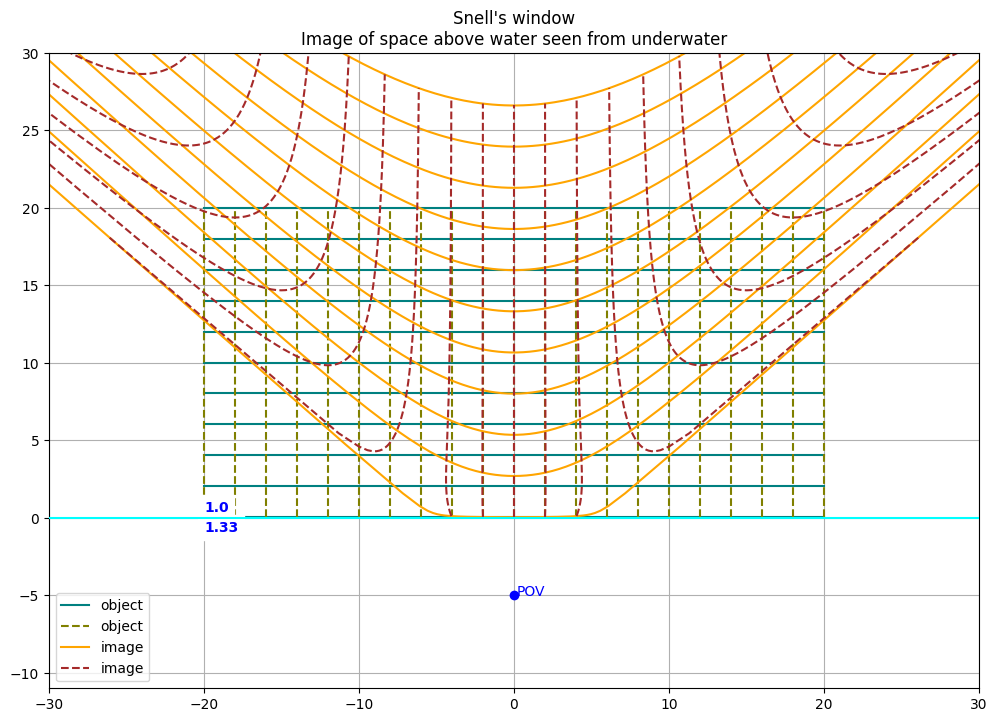

In [ ]:
# y 값 범위에서 수면은 제외하고 바로 위부터 포함한다. y >= delta
obj2 = xygrid([-20,20], [delta,20], 20, 10)
for ho in obj2.hors:
  ho.set_color(obj2.hcolor)
  ho.set_linestyle(obj2.hls)
for vo in obj2.vers:
  vo.set_color(obj2.vcolor)
  vo.set_linestyle(obj2.vls)

obj2.hors[0].label = 'object'
obj2.vers[0].label = 'object'

pov2 = [0, -5]
img2 = refraction_image(obj2, pov2, n1/n2)

plt.figure(figsize=(12, 10))
plt.axes().set_aspect('equal')
plt.xlim(-30, 30)
plt.ylim(-11, 30)

obj2.draw()
img2.draw()

plt.title("Snell's window\nImage of space above water seen from underwater")
plt.savefig('snell_window.png')
plt.savefig('snell_window.svg')

- 스넬의 창(원) 연직 위의 모습은 큰 왜곡 없이 거리만 굴절률의 비율에 가깝게 멀어져 보이는 반면, 스넬의 창 바깥 부분은, 방향은 원뿔 안으로 모이는 반면 거리는 늘어나 왜곡되는데, 특히 수면 가까운 곳일수록 왜곡이 심한 것을 볼 수 있다.